In [66]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [67]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [68]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [69]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Potato",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

Found 2152 files belonging to 3 classes.


In [70]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

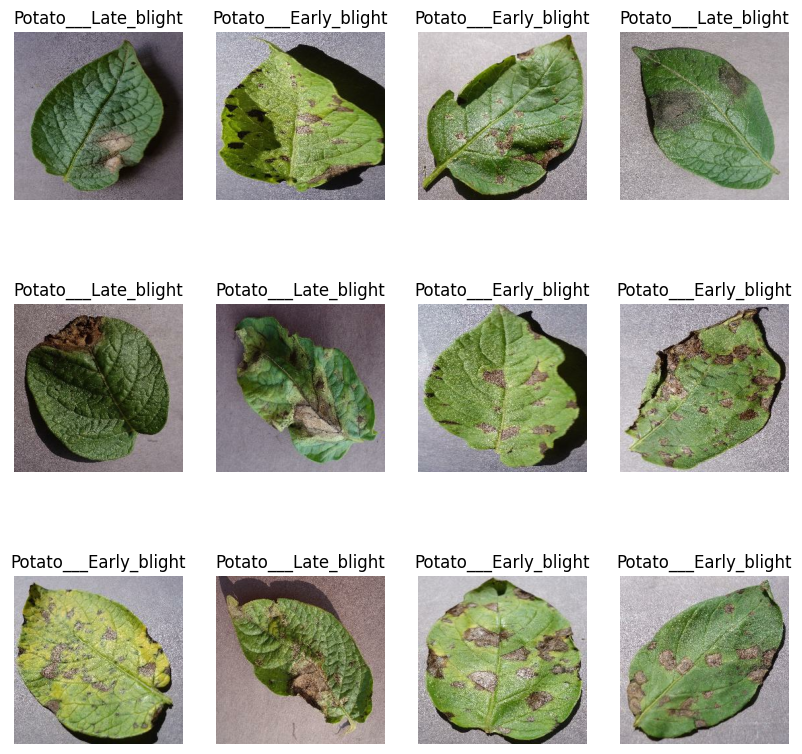

In [71]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    #print(image_batch.shape)
    #print(label_batch.numpy())

In [72]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1,test_split=0.1, shuffle=True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed =12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return(train_ds, val_ds, test_ds)

In [73]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [74]:
len(train_ds)

54

In [75]:
len(val_ds)

6

In [76]:
len(test_ds)

8

In [77]:

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [78]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [79]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [80]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_5 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [81]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [82]:
len(train_ds)

54

In [84]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
54/54 [==============================] - 96s 2s/step - loss: 0.9382 - accuracy: 0.4676 - val_loss: 0.9450 - val_accuracy: 0.4635
Epoch 2/20
54/54 [==============================] - 93s 2s/step - loss: 0.9051 - accuracy: 0.4647 - val_loss: 0.8970 - val_accuracy: 0.4688
Epoch 3/20
54/54 [==============================] - 84s 2s/step - loss: 0.9010 - accuracy: 0.4757 - val_loss: 0.8969 - val_accuracy: 0.4688
Epoch 4/20
54/54 [==============================] - 73s 1s/step - loss: 0.8975 - accuracy: 0.4850 - val_loss: 0.9018 - val_accuracy: 0.4635
Epoch 5/20
54/54 [==============================] - 70s 1s/step - loss: 0.9038 - accuracy: 0.4525 - val_loss: 0.8939 - val_accuracy: 0.4688
Epoch 6/20
54/54 [==============================] - 77s 1s/step - loss: 0.8988 - accuracy: 0.4664 - val_loss: 0.8984 - val_accuracy: 0.4635
Epoch 7/20
54/54 [==============================] - 75s 1s/step - loss: 0.8996 - accuracy: 0.4803 - val_loss: 0.9144 - val_accuracy: 0.4635
Epoch 8/20
54/54 [==

In [85]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 5s 299ms/step - loss: 0.9202 - accuracy: 0.5117


In [86]:
scores


[0.9201645255088806, 0.51171875]

In [87]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [88]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 506ms/step
predicted label: Potato___Early_blight


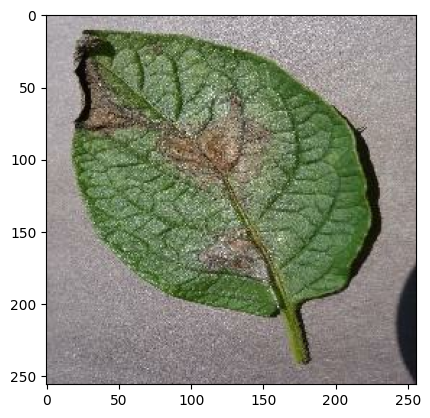

In [90]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [91]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 41ms/step


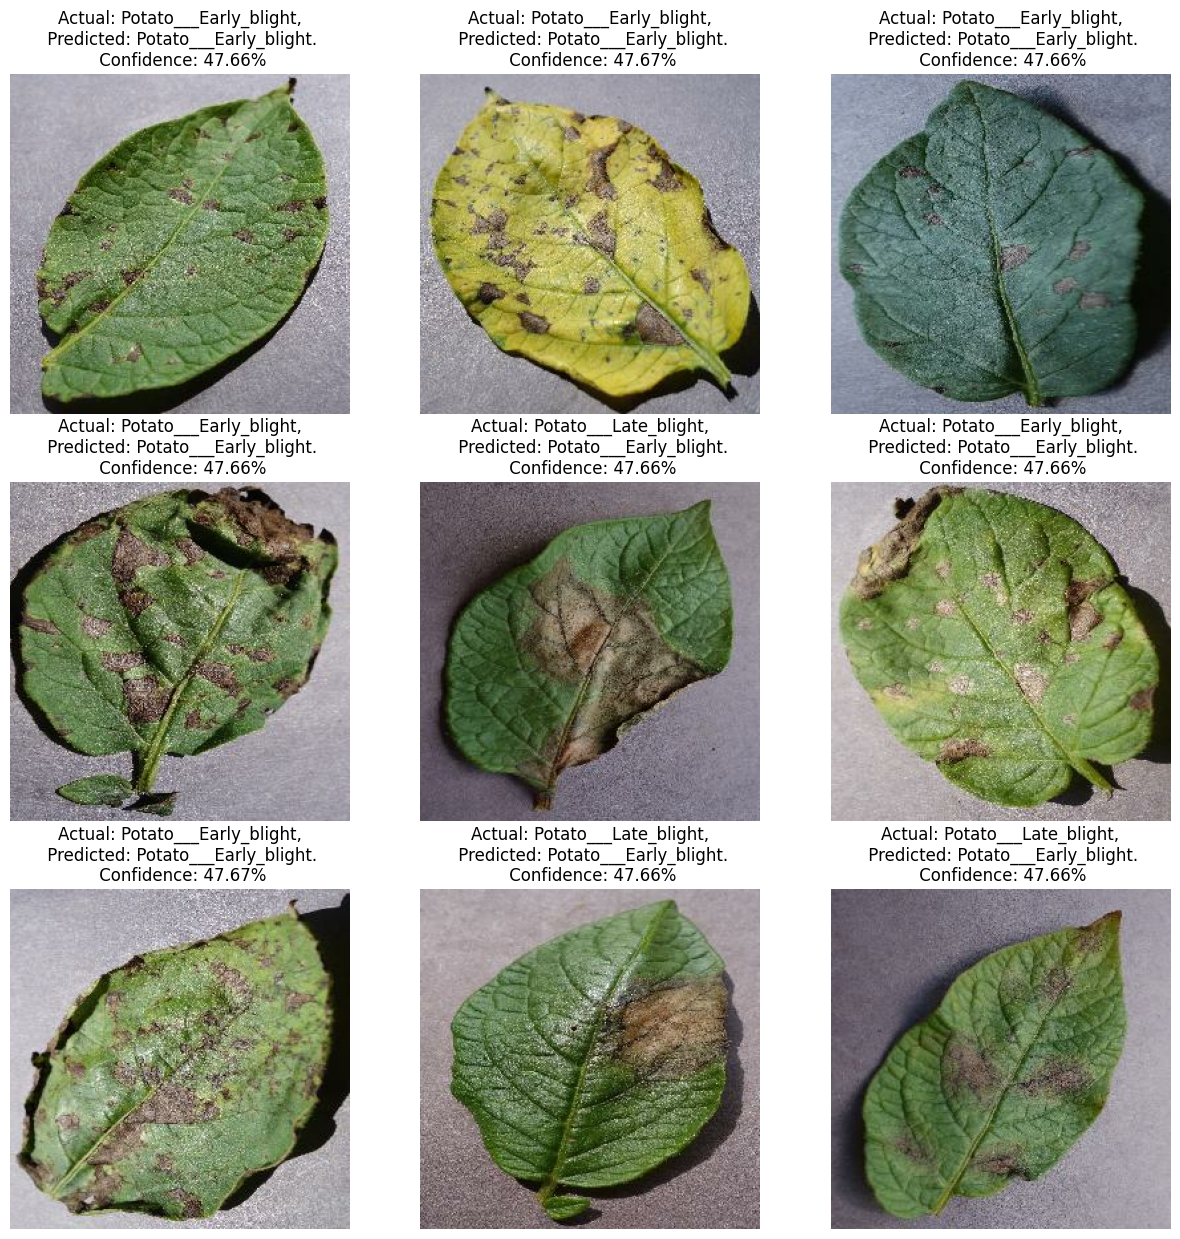

In [92]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [93]:
model.save("potato_model.h5")

In [94]:
def predict(model, filename):
    img=Image.open(filename)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [95]:
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfile

In [96]:
def upload_file():
     global img
     f_types = [('* .JPG', '*.jpg')]
     filename = filedialog.askopenfilename(filetypes=f_types)
     x = predict(model, filename)    
     print("PLant Health Status : " + x[0])
    
def retrieve_input():
    return textBox.get("1.0","end-1c")

In [97]:
from tkinter import *
from PIL import Image, ImageTk

my_w = tk.Tk()
my_w.geometry("400x150") # Size of the window
my_w.title('Plant Disease Checker')
my_font1=('times', 18, 'bold')
font2 = ('Nimbus Mono L', 10)
l1 = tk.Label(my_w,text='UPLOAD PLANT PHOTO',width=30,font=my_font1)
l1.grid(row=2,column=1,pady=10)

textBox=Text(my_w, height=1, width=17)
textBox.grid(row=4,column=1,pady=10)
b1 = tk.Button(my_w, text='UPLOAD IMAGE', width=20, command = lambda:upload_file())
b1.grid(row=6,column=1,pady=10)

my_w.mainloop()

1/1 [==============================] - 0s 32ms/step
PLant Health Status : Potato___Early_blight
